In [2]:
from pymlutil.functions import *
from pymlutil.jsonutil import cmd, ReadDict, WriteDict
from pymlutil.version import VersionString
from pymlutil.s3 import s3store, Connect
import torch
from matplotlib import pyplot as plt

### jsonutil
**ReadDict** returns a python dictionary from a json or yaml dictionary

In [5]:
dict = ReadDict('test.yaml')
dict['test_yaml']

[{'zero': 0}, {'one': 1}, {'two': 2}]

**cmd** executes shell commands and displays the result in the console

In [6]:
cmd('ls -la')

total 112
drwxrwxr-x 11 blarson blarson  4096 May 10 10:10 .
drwxrwxrwx 50 blarson blarson  4096 Apr 15 13:21 ..
drwxrwxr-x  4 blarson blarson  4096 Apr  4 15:39 build
-rw-rw-r--  1 blarson blarson   729 May  2 17:12 creds.yaml
-rwxrwxr-x  1 blarson blarson  4553 May  2 17:18 deploy
drwxrwxr-x  2 blarson blarson  4096 May 10 10:10 dist
drwxrwxr-x  8 blarson blarson  4096 May 17 16:48 .git
-rw-rw-r--  1 blarson blarson  1819 Apr 12 22:17 .gitignore
drwxrwxr-x  2 blarson blarson  4096 Apr 13 09:01 img
drwxrwxr-x  2 blarson blarson  4096 Apr 25 10:13 .ipynb_checkpoints
-rw-rw-r--  1 blarson blarson 11357 Apr 12 07:01 LICENSE
-rw-rw-r--  1 blarson blarson    81 Apr 29 09:22 MANIFESET.in
drwxrwxr-x  3 blarson blarson  4096 May  2 17:38 pymlutil
drwxrwxr-x  2 blarson blarson  4096 May 10 10:10 pymlutil.egg-info
-rw-rw-r--  1 blarson blarson 20758 May 17 16:57 pymlutil.ipynb
-rw-rw-r--  1 blarson blarson  1350 May 17 16:22 README.md
-rw-rw-r--  1 blarson blarson  1529 Apr 18 07:39 setup.py
dr

0

wxrwxr-x  4 blarson blarson  4096 May 17 16:24 tests
-rw-rw-r--  1 blarson blarson   231 May 17 16:45 test.yaml
drwxrwxr-x  2 blarson blarson  4096 Apr  8 10:55 .vscode


### functions
**GaussianBasis** computes a unit height gaussian bell curve function
$$ GaussianBasis(x, zero, sigma) = e^{-\frac{(x-zero)^2}{2*sigma^2}} $$
- x : function input
- zero : location of the peak center
- sigma: curve with or standard deviation

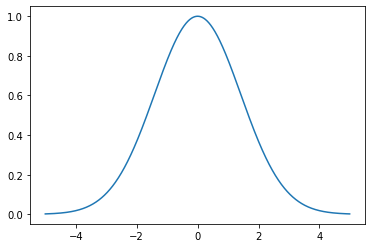

In [8]:
x = np.arange(-2.0, 2.0, 0.01) 
y = GaussianBasis(torch.tensor(x))
plt.plot(x, y)
plt.show()

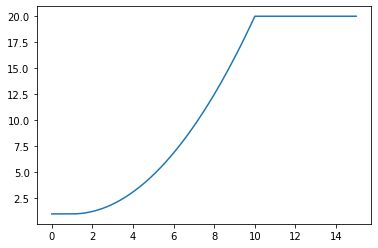

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pymlutil.functions import Exponential, GaussianBasis


vx = 1.0
vy = 1.0
px = 10.0
py = 20.0
power=2

expf =  Exponential(vx=vx, vy=vy, px=px, py=py, power=power)

x = np.arange(0, px+5, 0.01)
plt.plot(x, expf.f(x))
plt.show()

## S3
The pymutil s3 module provides an interface on top of the python minio library.  Class functions include
- __init__: managing urllib3 certificate and timeout paraemeters for connection to https and http endpoints
- PutDir: write local directory to object storage
- GetDir: 

In [5]:
credentials = "creds.yaml"
s3, creds, s3def = Connect(credentials)
s3def

{'name': 'store',
 'type': 'trainer',
 'address': '198.211.145.1:30990',
 'tls': False,
 'sets': {'dataset': {'bucket': 'mllib',
   'prefix': 'data',
   'dataset_filter': ''},
  'trainingset': {'bucket': 'mllib',
   'prefix': 'training',
   'dataset_filter': ''},
  'model': {'bucket': 'mllib', 'prefix': 'model', 'dataset_filter': ''},
  'test': {'bucket': 'mllib', 'prefix': 'test', 'dataset_filter': ''}}}

In [6]:
dest = '{}/{}'.format(s3def['sets']['dataset']['prefix'], 'testimages')
s3.PutDir(s3def['sets']['dataset']['bucket'], 'dataset', dest)

0it [00:00, ?it/s]


True

pymlutil provides exposes a module command line interface to the following functions

'''cmd
python3 -m pymlutil -p -src tests/testimages -set dataset -dest testimages
'''

In [8]:
! python3 -m pymlutil -p -src tests/testimages -set dataset -dest test/testimage

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 98.15it/s]
pymluitil complete


s3.GitDir copies an S3 path and all sub-objects to a directory from python or command line as follows:

In [ ]:
with tempfile.TemporaryDirectory() as tmpdirname:
    s3.GetDir(s3def['sets']['dataset']['bucket'], dest, tmpdirname)

In [ ]:
! python3 -m pymlutil -g -src test/testimages -set dataset -dest tests/testgitdir

The python module -clone parameter copies data from one S3 to another

ssh port forwarding:
```cmd
ssh -L 29990:ai2.cbd:30990 ai@ai2.cbd
```

```yaml
s3:
- name: store
  type: trainer
  address: 10.180.68.235:31994
  access key: <access key>
  secret key: <secret key>
  tls: false
  cert verify: false
  cert path: null
  sets:
    dataset: {"bucket":"annotations","prefix":"", "dataset_filter":"" }
    trainingset: {"bucket":"trainingset","prefix":"", "dataset_filter":"" }
    model: {"bucket":"savedmodel","prefix":"", "dataset_filter":"" }
    test: {"bucket":"test","prefix":"", "dataset_filter":"" }
- name: ai2
  type: trainer
  address: 127.0.0.1:29990
  access key: <access key>
  secret key: <secret key>
  tls: false
  cert verify: false
  cert path: null
  sets:
    dataset: {"bucket":"imgml","prefix":"data", "dataset_filter":"" }
    trainingset: {"bucket":"imgml","prefix":"training", "dataset_filter":"" }
    model: {"bucket":"imgml","prefix":"model", "dataset_filter":"" }
    test: {"bucket":"imgml","prefix":"test", "dataset_filter":"" }
```

In [ ]:
! python3 -m pymlutil -clone -srcS3 store -destS3 ai2 -src "" -dest lit